<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Generating-the-Submission-File" data-toc-modified-id="Generating-the-Submission-File-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Generating the Submission File</a></span><ul class="toc-item"><li><span><a href="#Creating-the-directory-for-the-submission-file" data-toc-modified-id="Creating-the-directory-for-the-submission-file-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Creating the directory for the submission file</a></span></li><li><span><a href="#Generating-the-submission-file" data-toc-modified-id="Generating-the-submission-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Generating the submission file</a></span></li></ul></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Part 2, Chapter 2, Section 2: Training Shallow Models
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Homework 1
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yuxiao Huang
</font>
</center>
</p>
</b>

# Overview

- This notebook includes homework 1 for Training Shallow Models (Part 2, Chapter 2, Section 2).
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/spring_2021/slides/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s2_training_shallow_models).
- Here we will work on kaggle competation [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview).
- The goal of this homework is tweaking the pipeline (including data preprocessing, hyperparameter tuning and model selection) implemented in [/p2 c2 s2 training shallow models/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2021/code/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s2_training_shallow_models/case_study/case_study.ipynb) to make it work for the new kaggle competation mentioned above.
- Complete the missing parts indicated by # Implement me.
- Particularly, the code should
    - be bug-free (note that the output produced by your solution may not necessarily be the same as the provided output, due to version issues)
    - be commented
- **The baseline for this assignment is -0.332515. As per the grading rubrics (section 15 of the syllabus), if the validation score of your best model is lower than or the same as the baseline, you will only receive 80% of the full mark. See more details in the grading rubrics.**
- Submit an ipynb file named homework_1.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_1/.

# Notebook Configuration

## Google drive

In [ ]:
from google.colab import drive
import sys
import os

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Get dirs
os.listdir()

['.config', 'drive', 'sample_data']

In [ ]:
# Copy from case study and comment/cite
# Need to take datetime vars and put into handling date time variables sample code
# Use google colab

In [ ]:
# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/fall_2021/homework/homework_1/'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/fall_2021/code/utilities/p2_shallow_learning/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/fall_2021/code/models/p2_shallow_learning/'

## Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing
**Note: You will need to specify the date time variables, *datetime_vars*, when handling date time variables**.

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/My Drive/Colab Notebooks/teaching/gwu/machine_learning_I/fall_2021/code/utilities/p2_shallow_learning


In [ ]:
print(os.listdir())

['pmlm_utilities_shallow.ipynb']


##**1) Loading the Data**

In [ ]:
# Implement me
import pandas as pd

# Load the raw training data
df_raw_train = pd.read_csv(abspath_curr + 'data/train.csv',
                           header=0)
# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Load the raw test data
df_raw_test = pd.read_csv(abspath_curr + 'data/test.csv',
                          header=0)
# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

# Get the name of the target
target = 'trip_duration'

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1458644,11


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,625134,9


In [ ]:
# Check train data loaded
df_train.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
# Check test data loaded
df_test.head(5)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


##**2) Splitting Data**
The code below shows how to divide the training data into training (80%) and validation (20%).



In [ ]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1166915,11


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,291729,11


##**3) Handling Uncommon Features**

**Identifying uncommon features**

The code below shows how to find common variables between the training, validation and test data.

In [ ]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,dropoff_latitude
1,dropoff_longitude
2,id
3,passenger_count
4,pickup_datetime
5,pickup_latitude
6,pickup_longitude
7,store_and_fwd_flag
8,trip_duration
9,vendor_id


The code below shows how to find features in the training data but not in the validation or test data.



In [ ]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature
0,dropoff_datetime


The code below shows how to find the features in the validation data but not in the training or test data.


In [ ]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature
0,dropoff_datetime


The code below shows how to find the features in the test data but not in the training or validation data.

In [ ]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


### **Removing Uncommon Features**

In [ ]:
# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

# Print the first 5 rows of df_train
df_train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id0458976,2,2016-06-29 18:21:02,1,-73.862762,40.768822,-73.891701,40.746689,N,1133
1,id0434613,2,2016-04-25 13:03:26,1,-73.958038,40.783237,-73.975510,40.760853,N,887
2,id3809234,2,2016-05-07 12:36:09,1,-73.969460,40.785519,-73.989243,40.771748,N,686
3,id1203705,1,2016-05-14 18:44:17,1,-73.981743,40.736549,-73.998352,40.726440,N,818
4,id1896645,2,2016-04-10 22:51:25,1,-73.977913,40.752609,-73.975647,40.733139,N,951


In [ ]:
# Remove the uncommon features from the validation data
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)

# Print the first 5 rows of df_val
df_val.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [ ]:
# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of df_test
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


##**4) Handling identifiers**
**Combining the training, validation and test data**

The code below shows how to combine the training, validation and test data.

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

**Identifying Identifiers**

The code below shows how to find identifiers from data.


In [ ]:
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,id
0,id0458976
1,id0434613
2,id3809234
3,id1203705
4,id1896645


###**Removing Identifiers**
The code below shows how to remove identifiers from data.


In [ ]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
# Print the first 5 rows of df_train
df_train.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-06-29 18:21:02,1,-73.862762,40.768822,-73.891701,40.746689,N,1133
1,2,2016-04-25 13:03:26,1,-73.958038,40.783237,-73.975510,40.760853,N,887
2,2,2016-05-07 12:36:09,1,-73.969460,40.785519,-73.989243,40.771748,N,686
3,1,2016-05-14 18:44:17,1,-73.981743,40.736549,-73.998352,40.726440,N,818
4,2,2016-04-10 22:51:25,1,-73.977913,40.752609,-73.975647,40.733139,N,951


In [ ]:
# Print the first 5 rows of df_val
df_val.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967


In [ ]:
# Print the first 5 rows of df_test
df_test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


##**5) Handling date time variables**
**Transforming date time variables**

The code below shows how to transform date time variables into the following 6 datetime types:

* year
* month
* day
* hour
* minute
* second

In [ ]:
# Get the date time variables
datetime_vars = ['pickup_datetime',]

In [ ]:
# Call datetime_transformer on df_train
# See the implementation in pmlm_utilities.ipynb
df_train = datetime_transformer(df_train, datetime_vars)

# Print the first 5 rows of df_train
df_train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second
0,2,1,-73.862762,40.768822,-73.891701,40.746689,N,1133,2016,6,29,18,21,2
1,2,1,-73.958038,40.783237,-73.975510,40.760853,N,887,2016,4,25,13,3,26
2,2,1,-73.969460,40.785519,-73.989243,40.771748,N,686,2016,5,7,12,36,9
3,1,1,-73.981743,40.736549,-73.998352,40.726440,N,818,2016,5,14,18,44,17
4,2,1,-73.977913,40.752609,-73.975647,40.733139,N,951,2016,4,10,22,51,25


In [ ]:
# Call datetime_transformer on df_val
# See the implementation in pmlm_utilities.ipynb
df_val = datetime_transformer(df_val, datetime_vars)

# Print the first 5 rows of df_val
df_val.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second
0,2,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,2016,6,8,7,36,19
1,2,1,-73.978394,40.764351,-73.991623,40.749859,N,827,2016,4,3,12,58,11
2,2,5,-73.989059,40.744389,-73.973381,40.748692,N,614,2016,6,5,2,49,13
3,2,2,-73.990326,40.731136,-73.991264,40.748917,N,867,2016,5,5,17,18,27
4,1,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,2016,5,12,17,43,38


In [ ]:
# Call datetime_transformer on df_test
# See the implementation in pmlm_utilities.ipynb
df_test = datetime_transformer(df_test, datetime_vars)

# Print the first 5 rows of df_test
df_test.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second
0,1,1,-73.988129,40.732029,-73.990173,40.756680,N,2016,6,30,23,59,58
1,1,1,-73.964203,40.679993,-73.959808,40.655403,N,2016,6,30,23,59,53
2,1,1,-73.997437,40.737583,-73.986160,40.729523,N,2016,6,30,23,59,47
3,2,1,-73.956070,40.771900,-73.986427,40.730469,N,2016,6,30,23,59,41
4,1,1,-73.970215,40.761475,-73.961510,40.755890,N,2016,6,30,23,59,33


##**6) Handling missing data**

**Combining the training, validation and test data**

The code below shows how to combine the training, validation and test data.

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

###**Identifying missing values**

The code below shows how to find variables with NaN, their proportion of NaN and data type.

In [ ]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,trip_duration,0.3,float64


In [ ]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64


The code below shows how to use data type to select variables with missing values in the combined data.


In [ ]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,trip_duration,0.3,float64


###**Separating the training, validation and test data**

The code below shows how to separate the training, validation and test data.

In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1166915,14


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,291729,14


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,625134,14


###**Imputing missing values**

The code below shows how to use the mean of a numerical feature to impute its missing values.

In [ ]:
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='median')

    # Impute the variables with missing values in df_train, df_val and df_test 
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

# I think median might be a better imputing strategy than mean for trip duration.

##**7) Encoding the data**

**Combining the training, validation and test data**

The code below shows how to combine the training, validation and test data.

In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,int64
1,float64
2,object


###**Identifying categorical variables**

The code below shows how to find categorical variables (whose data type is dtype) and their number of unique value.

In [ ]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,store_and_fwd_flag,2


###**Encoding categorical features**

The code below shows how to encode categorical features in the combined data.

In [ ]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 5 rows of df
df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,1,-73.862762,40.768822,-73.891701,40.746689,1133.0,2016,6,29,18,21,2,1,0
1,2,1,-73.958038,40.783237,-73.975510,40.760853,887.0,2016,4,25,13,3,26,1,0
2,2,1,-73.969460,40.785519,-73.989243,40.771748,686.0,2016,5,7,12,36,9,1,0
3,1,1,-73.981743,40.736549,-73.998352,40.726440,818.0,2016,5,14,18,44,17,1,0
4,2,1,-73.977913,40.752609,-73.975647,40.733139,951.0,2016,4,10,22,51,25,1,0


###**Separating the training, validation and test data**

The code below shows how to separate the training, validation and test data.

In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1166915,15


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,291729,15


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,625134,15


##**8) Splitting the feature and target**

The code below shows how to split the feature and target.

In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

##**9) Scaling the data**


Let's see what our distributions and outliers look like for each variable before deciding on Standardization or Min-Max Normalization.

Let's use a boxplot.

[Text(0.5, 1.0, 'Boxplot of Variables')]

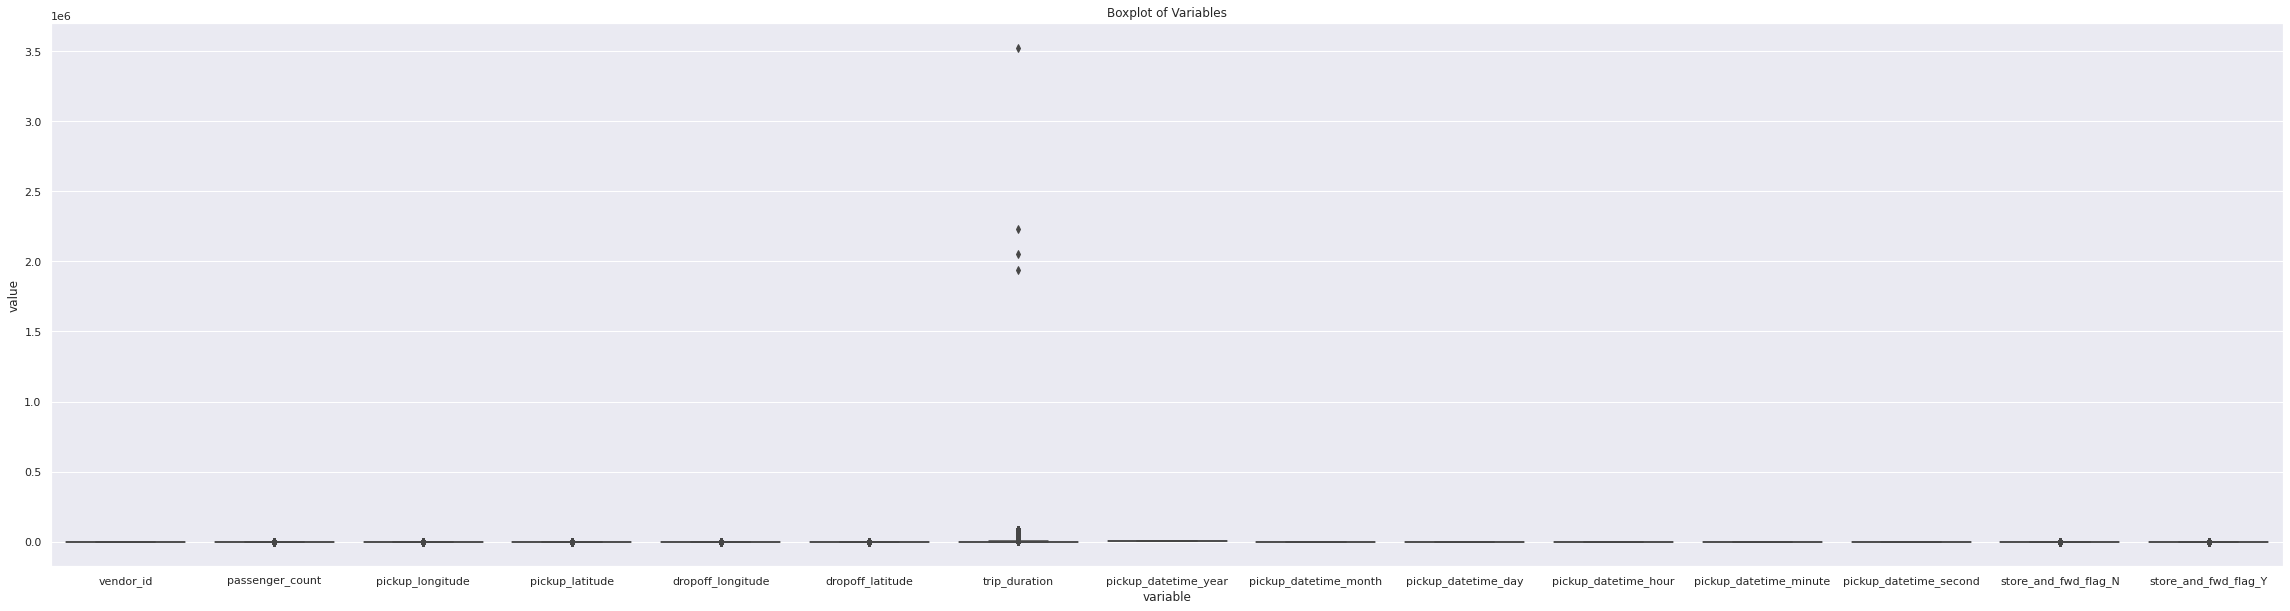

In [ ]:
import seaborn as sns

# Make copy for plot
df_boxplot = df.copy(deep=True)

# Set figure size
sns.set(rc={"figure.figsize":(40, 10)})

# Plot boxplot
sns.boxplot(x="variable", y="value", data=pd.melt(df_boxplot)).set(title='Boxplot of Variables')

Not perfect here since each variable has different magnitude of values but just want to get a sense of the outliers within each variable. I do see quite a few outliers in a few variables here.

Looks like trip duration has lots of outliers, standardization may be the scaling method to use, but I want to see higher resolution on the other variables.

Let's re-plot without 'trip_duration' variable.

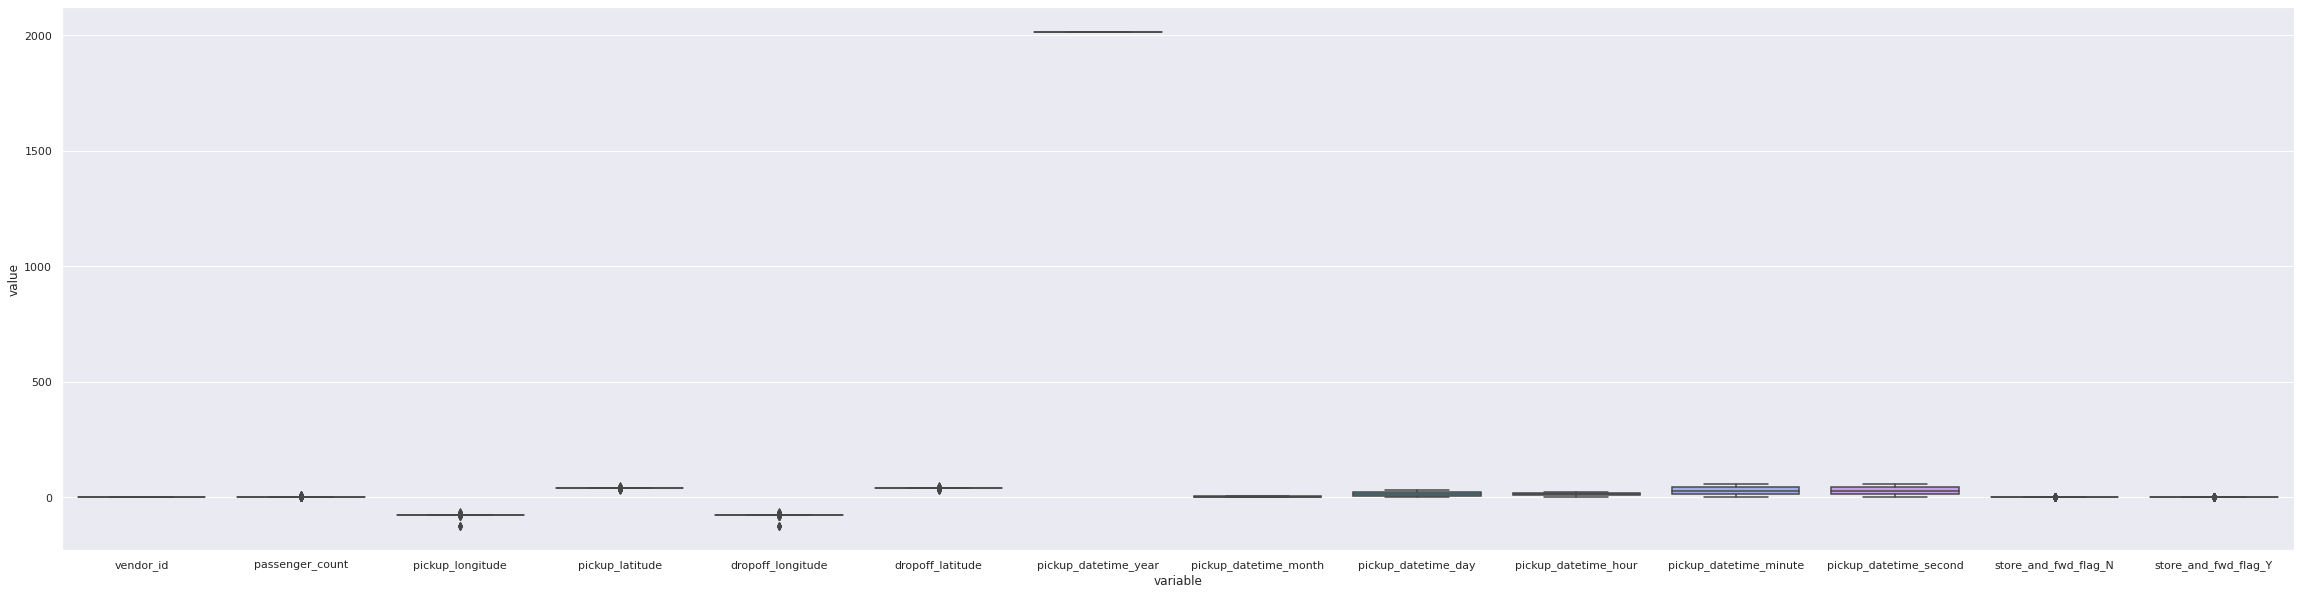

In [ ]:
# Re-plot without 'trip_duration'
df_boxplot.drop('trip_duration', axis=1, inplace=True)

# Re-plot boxplot
sns.boxplot(x="variable", y="value", data=pd.melt(df_boxplot))

Looks like at least half of variables have obvious outliers. Let's go ahead and use Standardization since if works better with outliers.

**Standardization**

The code below shows how to standardize the data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

**Standardizing the features**

The code below shows how to standardize the features.

In [ ]:
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

**Standardizing the target**

The code below shows how to standardize the features.

In [ ]:
# Standardize the training data
y_train = ss.fit_transform(y_train.reshape(-1, 1)).reshape(-1)

# Standardize the validation data
y_val = ss.transform(y_val.reshape(-1, 1)).reshape(-1)

# Standardize the test data
y_test = ss.transform(y_test.reshape(-1, 1)).reshape(-1)

##**Let's Check MSE of Base SGD Without Tuning**

In [ ]:
from sklearn.linear_model import SGDRegressor

# The SGDRegressor
sgdr = SGDRegressor()

# Train sgdr
sgdr.fit(X_train, y_train)

# Get the prediction on the validation data using sgdr
y_val_pred_sgdr = sgdr.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error

# Print the validation mean squared error with respect to SGDRegressor
pd.DataFrame([mean_squared_error(y_val, y_val_pred_sgdr)], columns=['MSE'])

,MSE
0,0.332785


Let's see if we can improve it

# Hyperparameter Tuning



**Creating the dictionary of the models**

In the dictionary:

1.   the key is the acronym of the model
2.   the value is the model

In [ ]:
models = {'sgd': SGDRegressor(random_state=random_seed)}

**Creating the dictionary of the pipelines**

In the dictionary:

1. the key is the acronym of the model
2. the value is the pipeline, which, for now, only includes the model

In [ ]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

**Getting the predefined split cross-validator**


In [ ]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

##**GridSearchCV**

**Creating the dictionary of the parameter grids**

In the dictionary:
1. the key is the acronym of the model
2. the value is the parameter grid of the model

In [ ]:
param_grids = {}

The parameter grid for SGDRegressor

The hyperparameters we want to fine-tune are:
1. eta0
2. alpha

*See details of the meaning of the hyperparametes in sklearn.linear_model.SGDRegressor*

In [ ]:
# Get param keys
SGDRegressor().get_params().keys()

dict_keys(['alpha', 'average', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter_no_change', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [ ]:
# The parameter grid of eta
eta_grid = [0.013, 0.01383, 0.014]
# eta_grid = [0.001, 0.01]

# The parameter grid of alpha
alpha_grid = [0.05, 0.06, 0.07]
# alpha_grid = [0.01, 0.1]

# The parameter grid of gamma (L1 ratio)
# l1_ratio_grid = [0, 0.5, 0.9]
l1_ratio_grid = [0, 0.2, 0.4, 0.6, 0.8, 1]

# The parameter grid of penalty (regularization)
penalty_grid = ['elasticnet',]

# Update param_grids
param_grids['sgd'] = [{'model__eta0': eta_grid,
                       'model__alpha': alpha_grid,
                      # 'model__penalty': penalty_grid,
                      'model__l1_ratio': l1_ratio_grid,
                       }]

**Creating the directory for the cv results produced by GridSearchCV¶**


In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

**Tuning the hyperparameters**

The code below shows how to fine-tune the hyperparameters of SGDRegressor and LinearRegression_MBGD using sklearn GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='neg_mean_squared_error',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True,
                      refit=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + 'result/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,-0.332482,"{'model__alpha': 0.06, 'model__eta0': 0.01383,...","(SGDRegressor(alpha=0.06, average=False, early..."


**Let's take a look at the validation curves**


[Following code repurposed from](https://stackoverflow.com/questions/62363657/how-can-i-plot-validation-curves-using-the-results-from-gridsearchcv)

In [ ]:
def pooled_var(stds):
    # https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
    n = 5 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

In [ ]:
results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']

In [ ]:
# cv_results

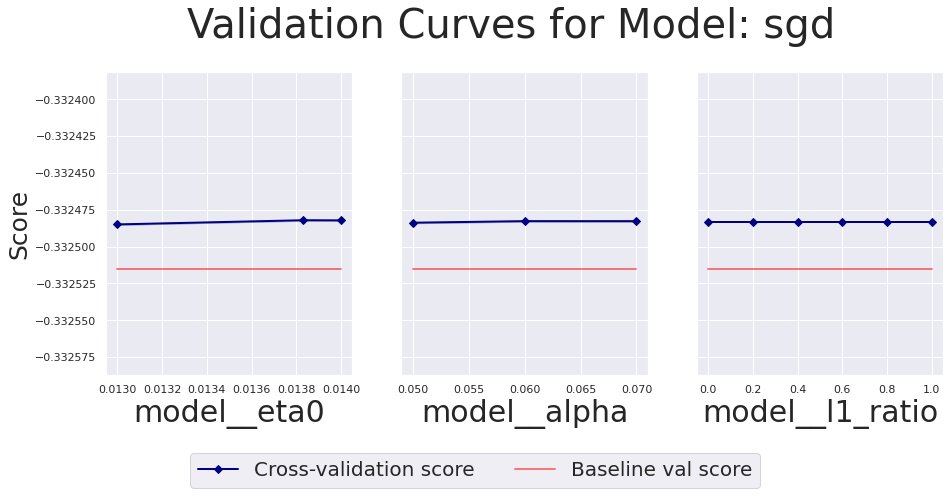

In [ ]:
for model, grid_params in param_grids.items():
  grid_params = grid_params[0]

  fig, axes = plt.subplots(1, len(grid_params), 
                          figsize = (5*len(grid_params), 7),
                          sharey='row')
  axes[0].set_ylabel("Score", fontsize=25)


  for idx, (param_name, param_range) in enumerate(grid_params.items()):
      baseline = -0.332515 * np.ones(len(param_range))
      baseline_df = pd.DataFrame(baseline, columns=['Baseline Val Score'])
      grouped_df = cv_results.groupby(f'param_{param_name}')[results]\
          .agg({'mean_train_score': 'mean',
                'mean_test_score': 'mean',
                'std_train_score': pooled_var,
                'std_test_score': pooled_var})

      previous_group = cv_results.groupby(f'param_{param_name}')[results]
      axes[idx].set_xlabel(param_name, fontsize=30)
      # ymax = best_score_params_estimator_gs[0][0] + cv_results[cv_results['mean_test_score'] == best_score_params_estimator_gs[0][0]]['std_test_score'] + 0.1
      ymax = cv_results['mean_test_score'].max() + 0.0001
      ymin = cv_results['mean_test_score'].min() - 0.0001
      axes[idx].set_ylim(ymin, ymax)
      lw = 2
      # Let's take out the training scores and focus on val score for now.
      # axes[idx].plot(param_range, grouped_df['mean_train_score'], label="Training score",
      #             color="darkorange", lw=lw, marker='D')
      # axes[idx].fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
      #                 grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
      #                 color="darkorange", lw=lw)
      axes[idx].plot(param_range, grouped_df['mean_test_score'], label="Cross-validation score",
                  color="navy", lw=lw, marker='D')
      axes[idx].fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                      grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                      color="navy", lw=lw)
      axes[idx].plot(param_range, baseline_df['Baseline Val Score'], label="Baseline val score",
                  color="red", lw=lw, linestyle='-', alpha=0.5)

  handles, labels = axes[0].get_legend_handles_labels()
  fig.suptitle('Validation Curves for Model: {}'.format(model), fontsize=40)
  fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

  fig.subplots_adjust(bottom=0.25, top=0.85)  
  plt.show()

##**Observations While Tuning Hyperparameters**

eta_0 after 0.1 is really bad
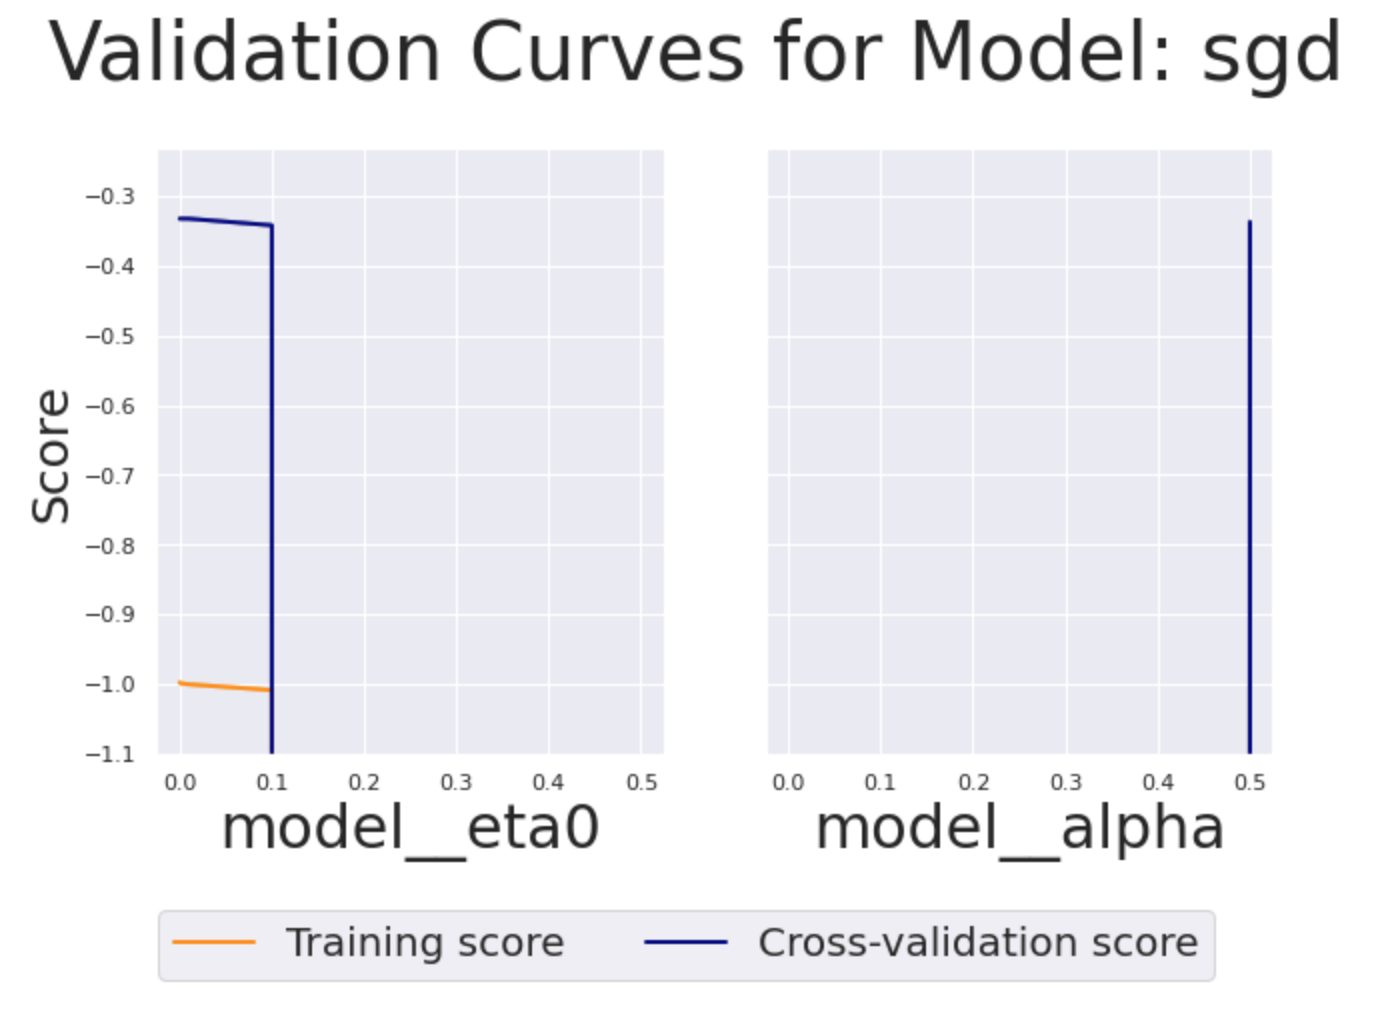

Looks really overfitted, let's add regularization to model
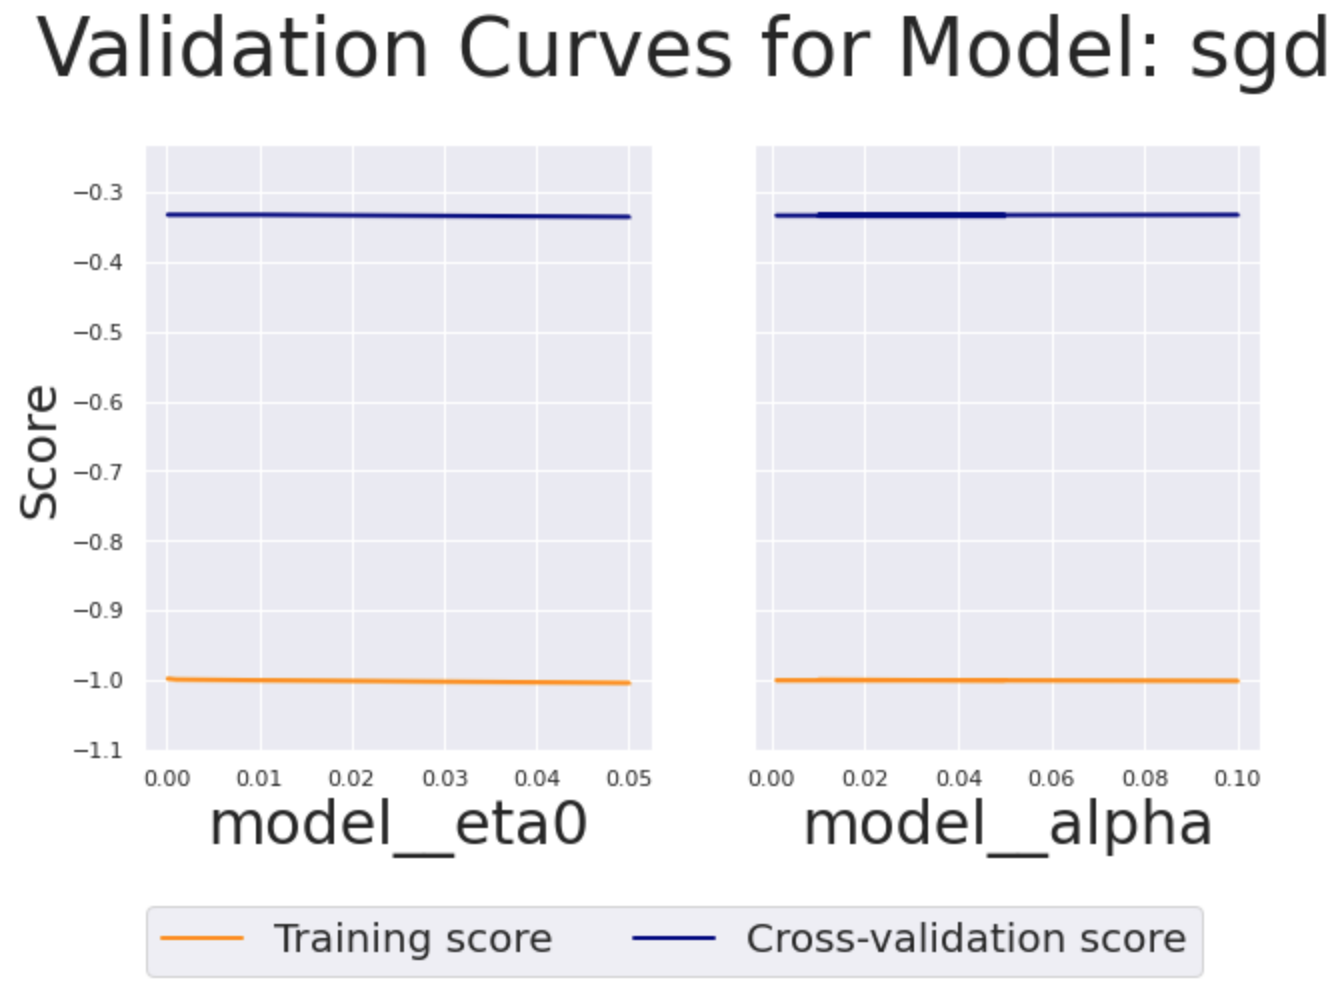

Looks like eta > 0.015, alpha < 0.075 gets better scores

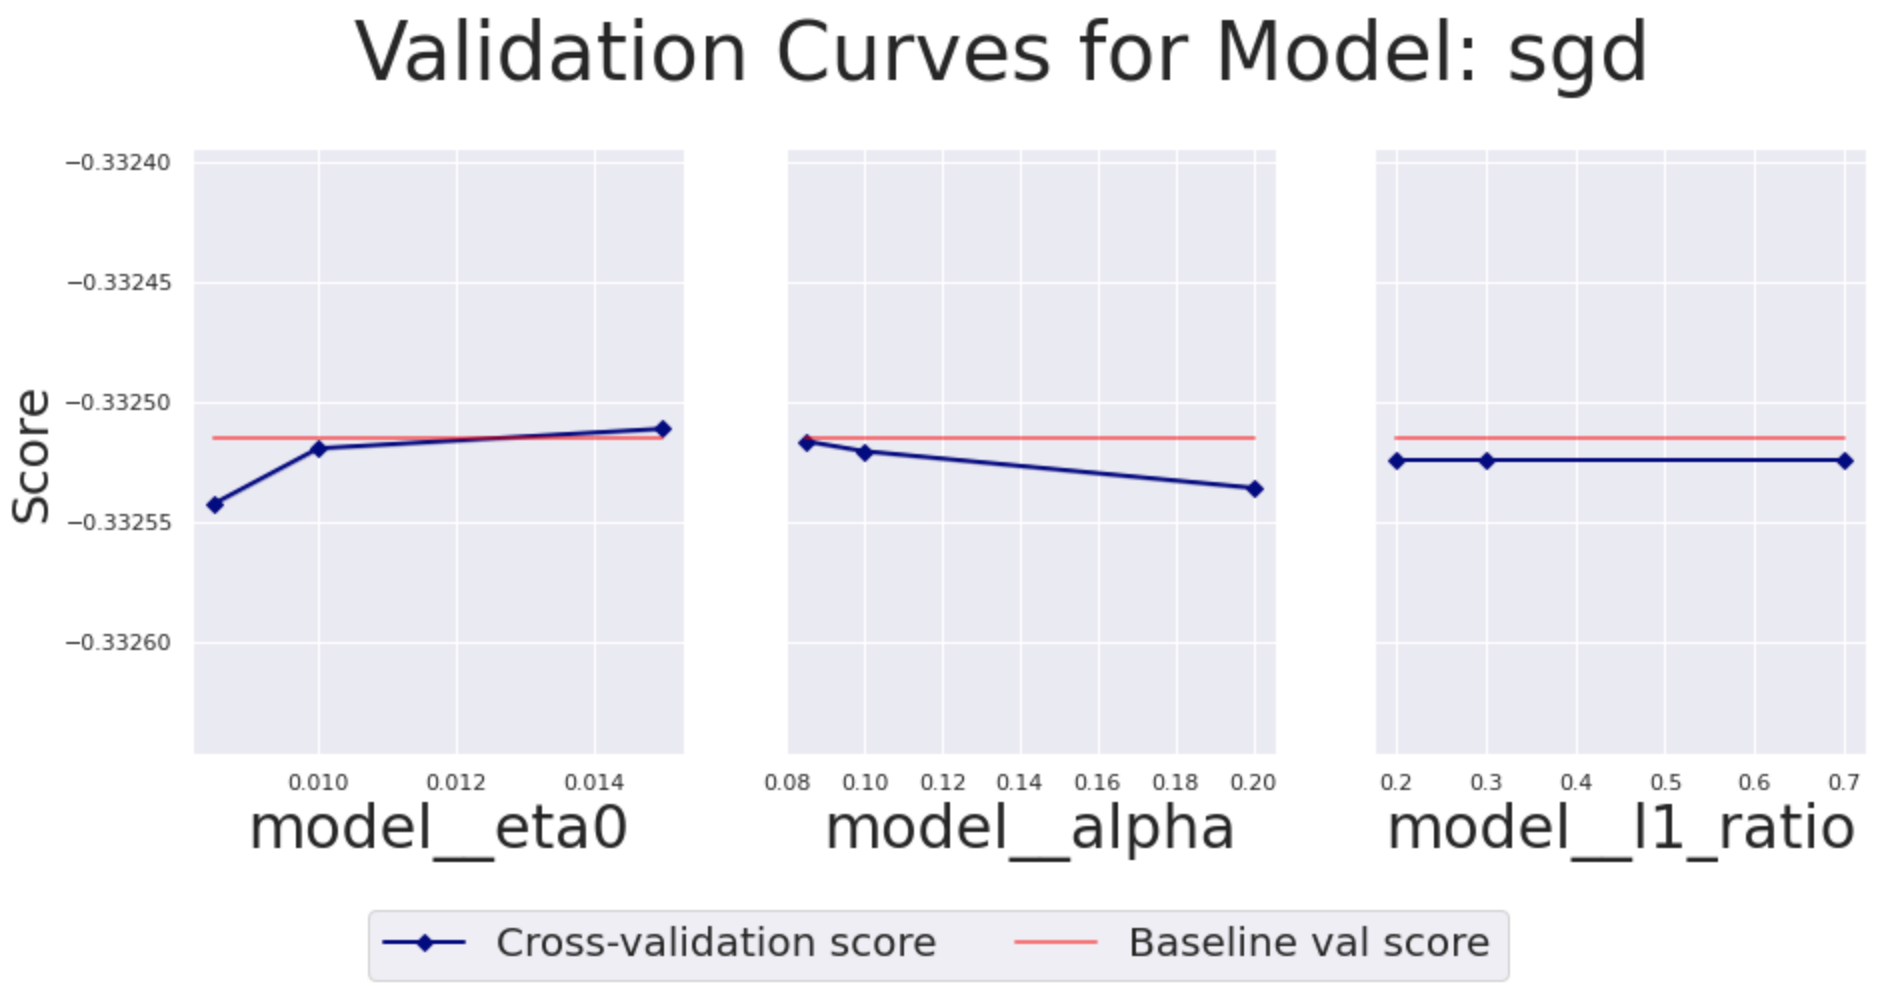

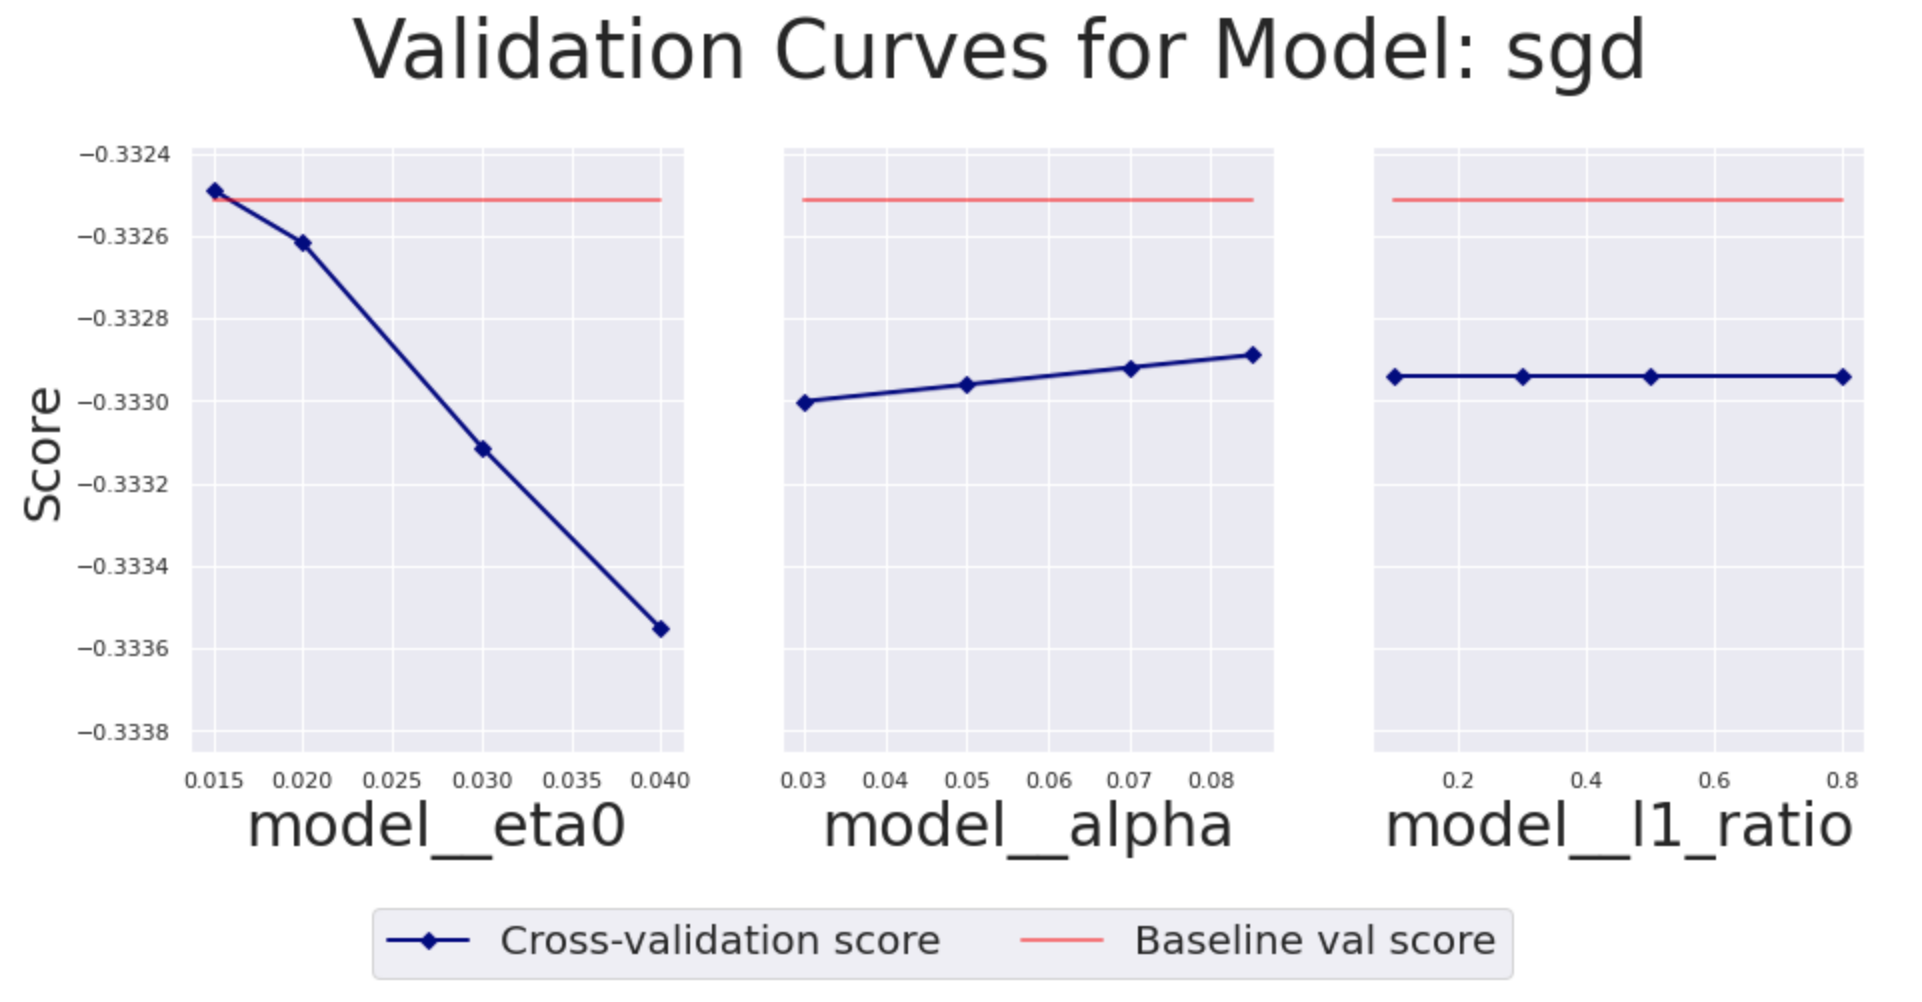

Use Elastic Net
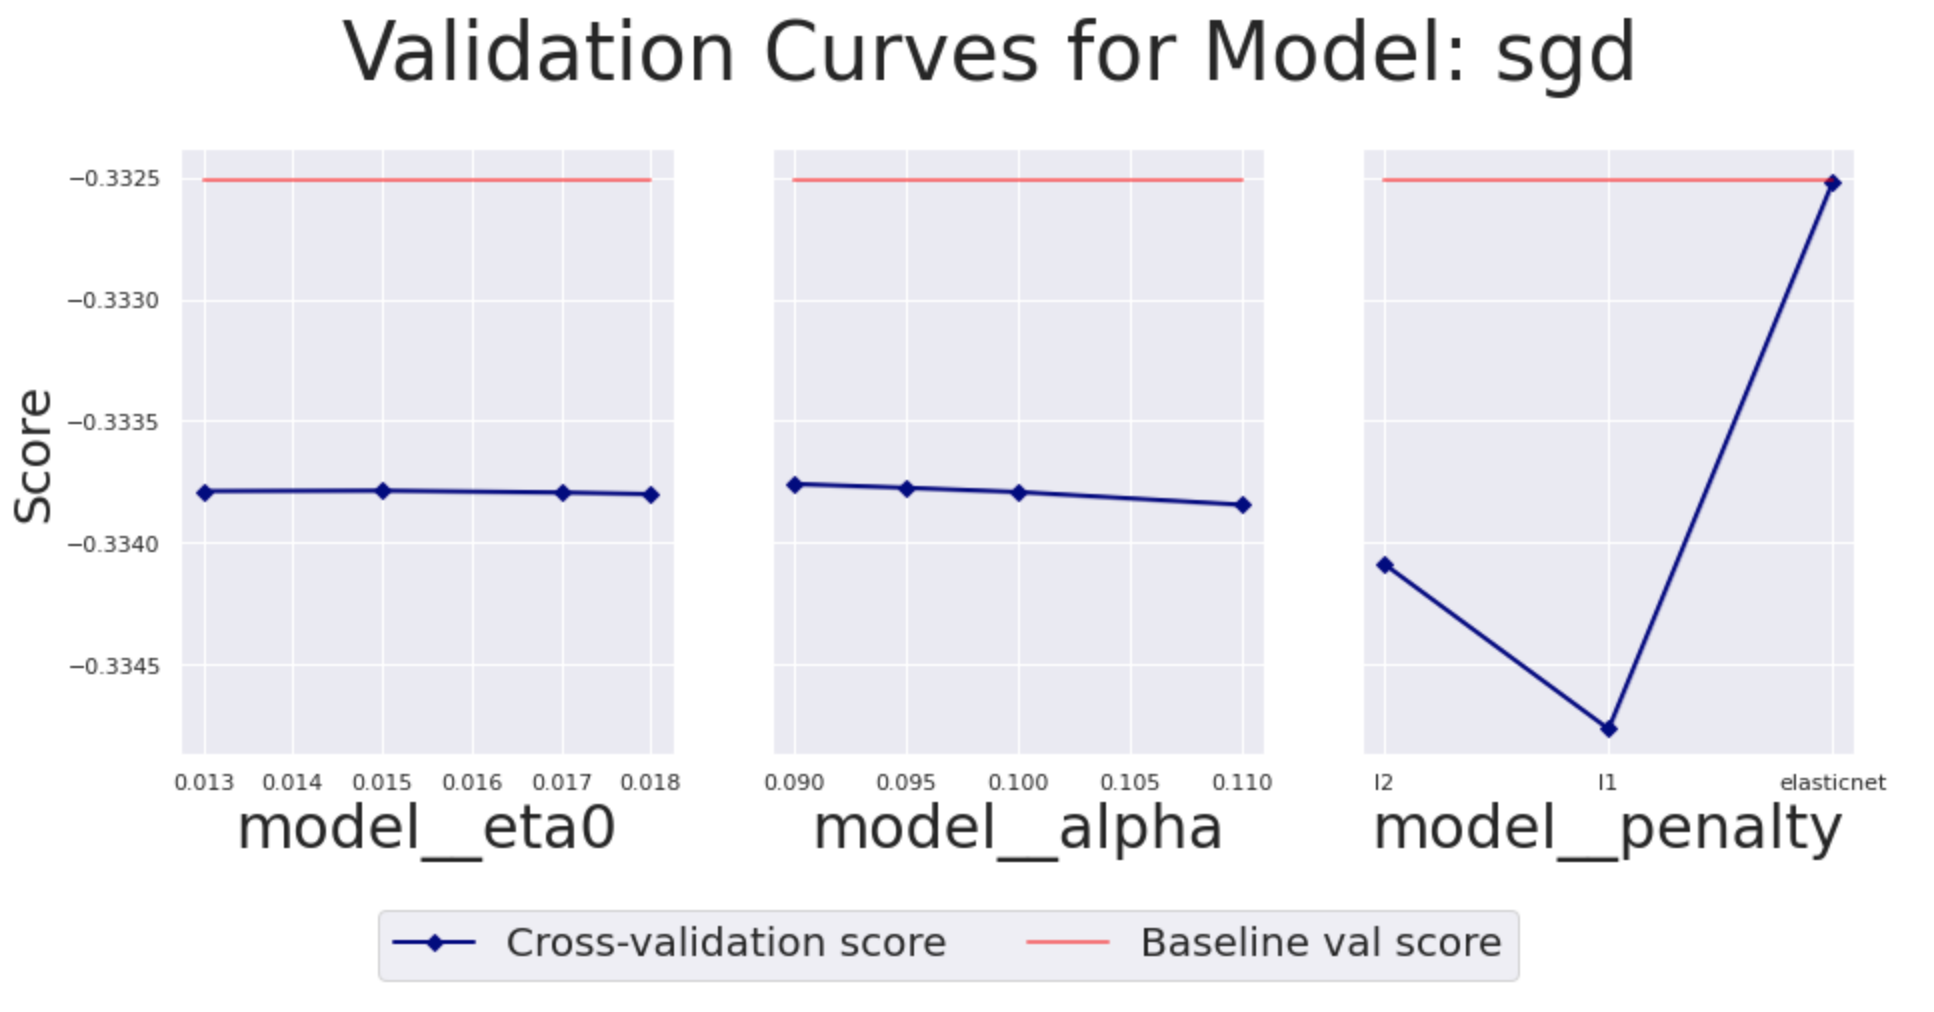

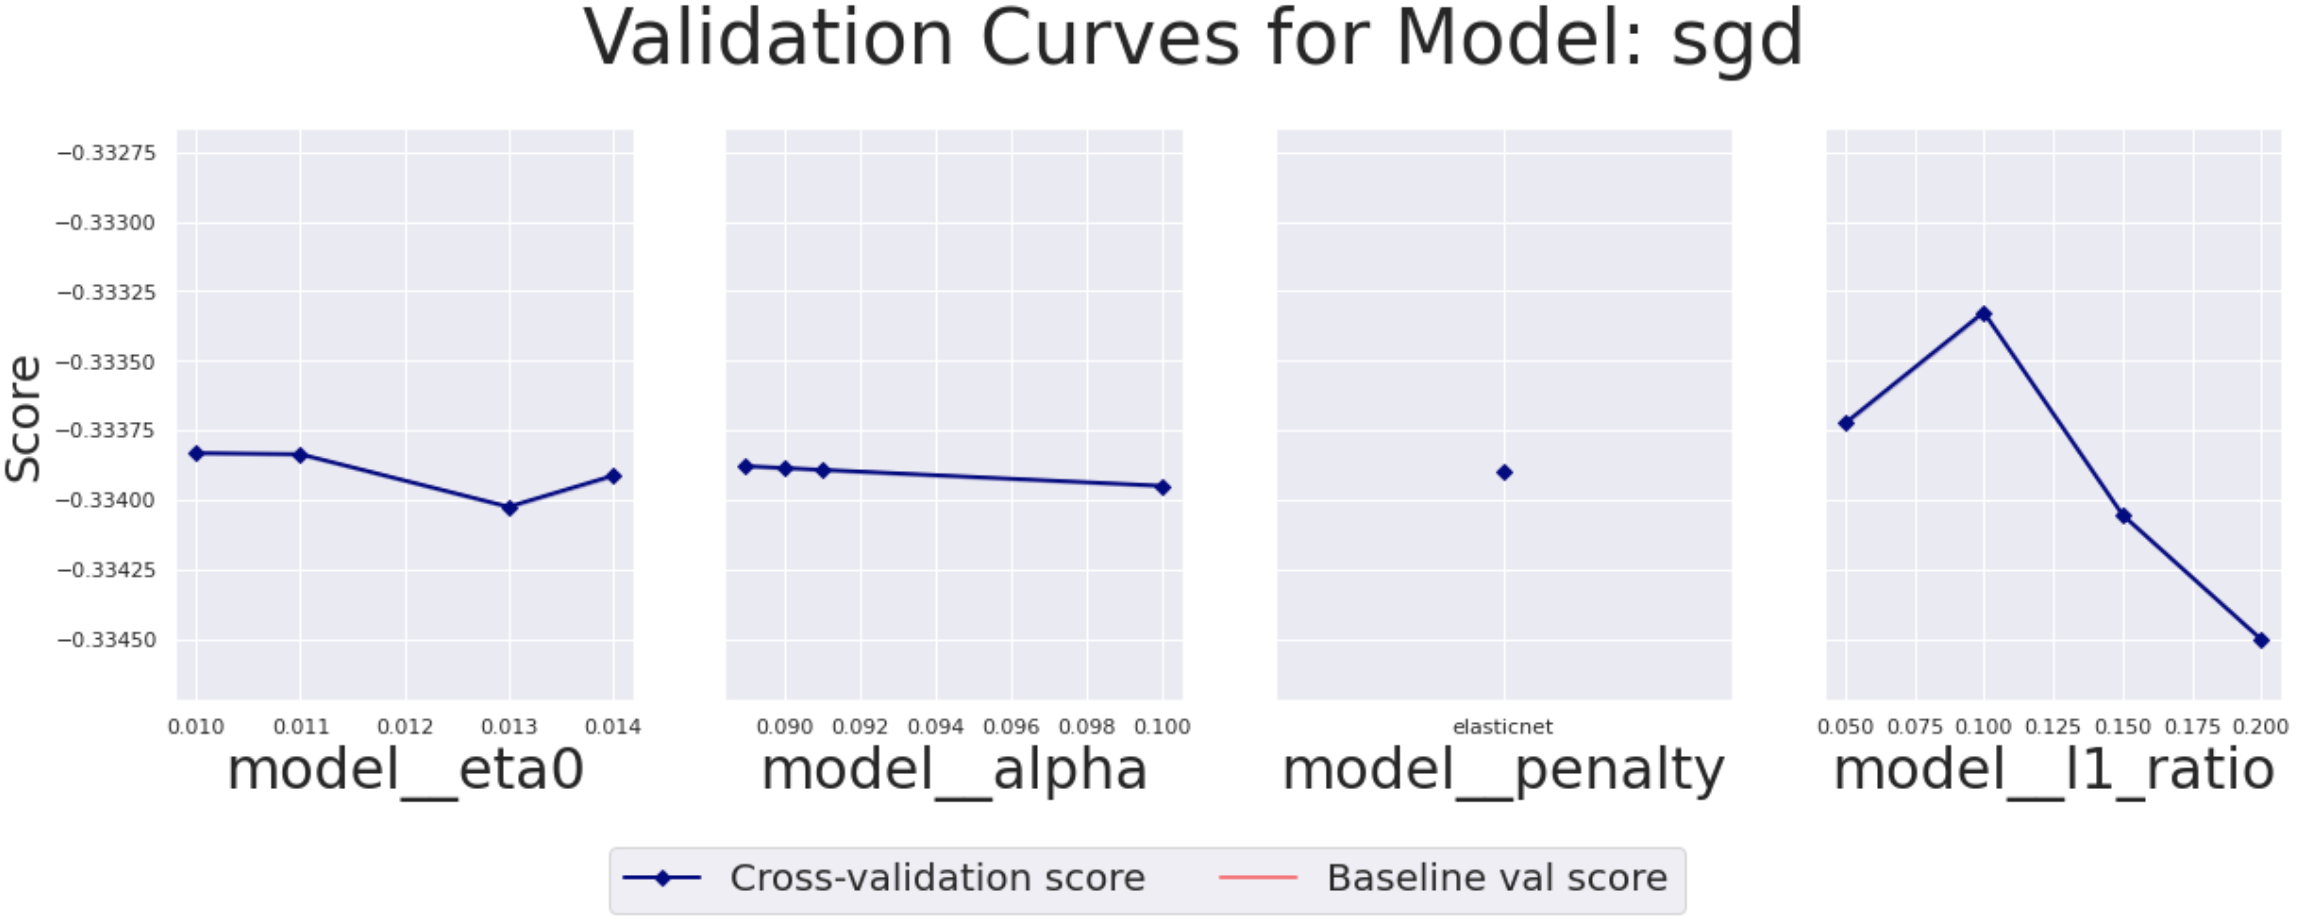

Finally above baseline score!
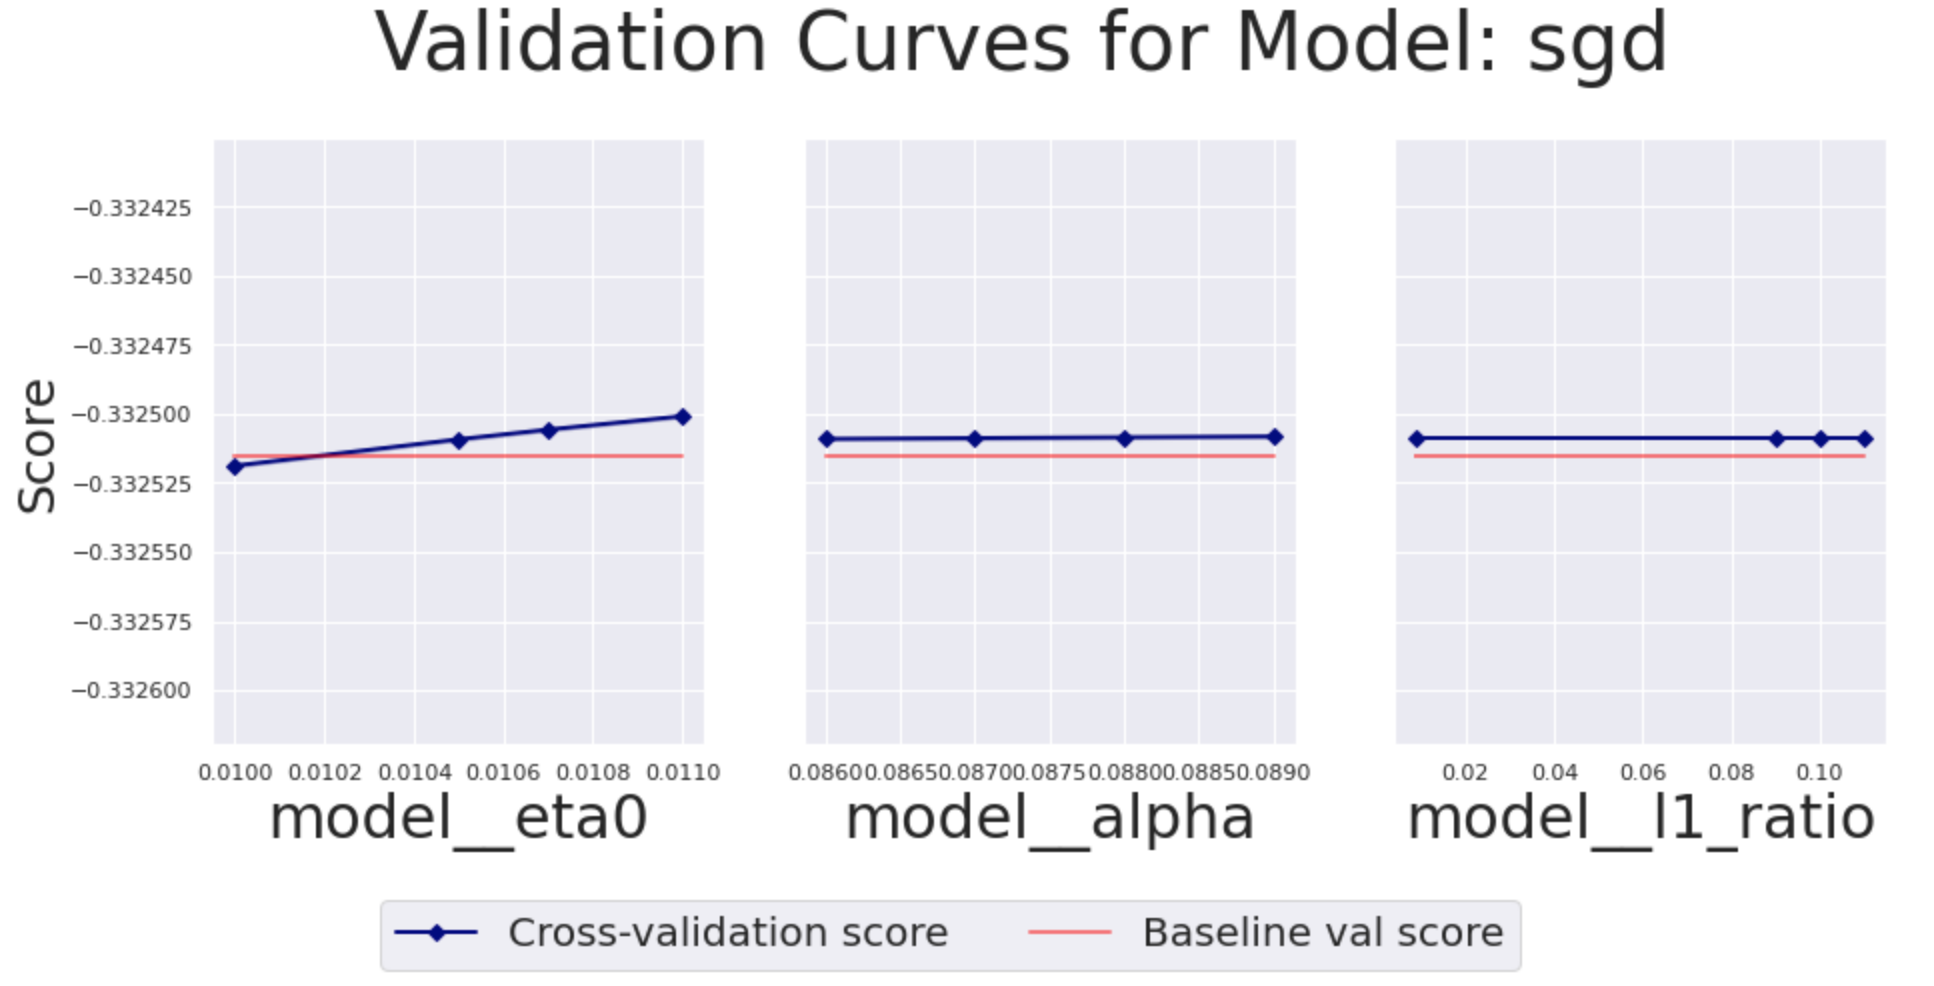

Getting better
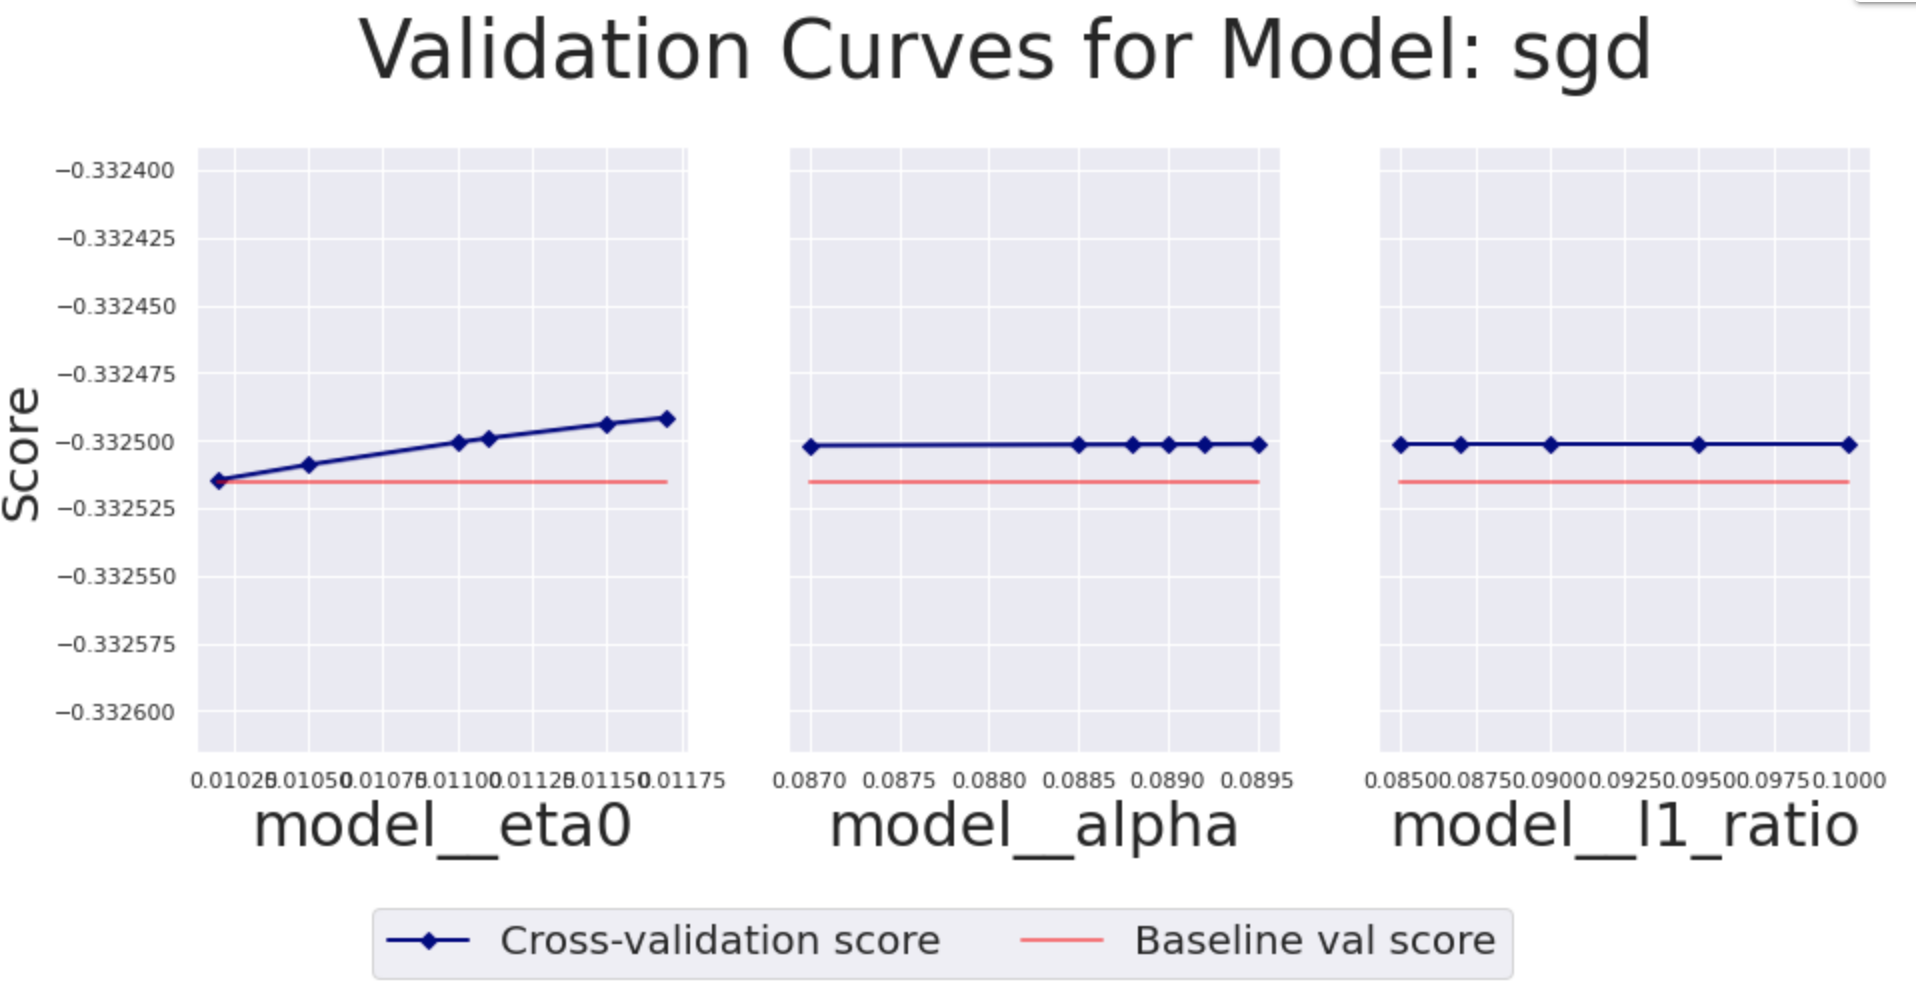

Peak at eta0 = 0.013

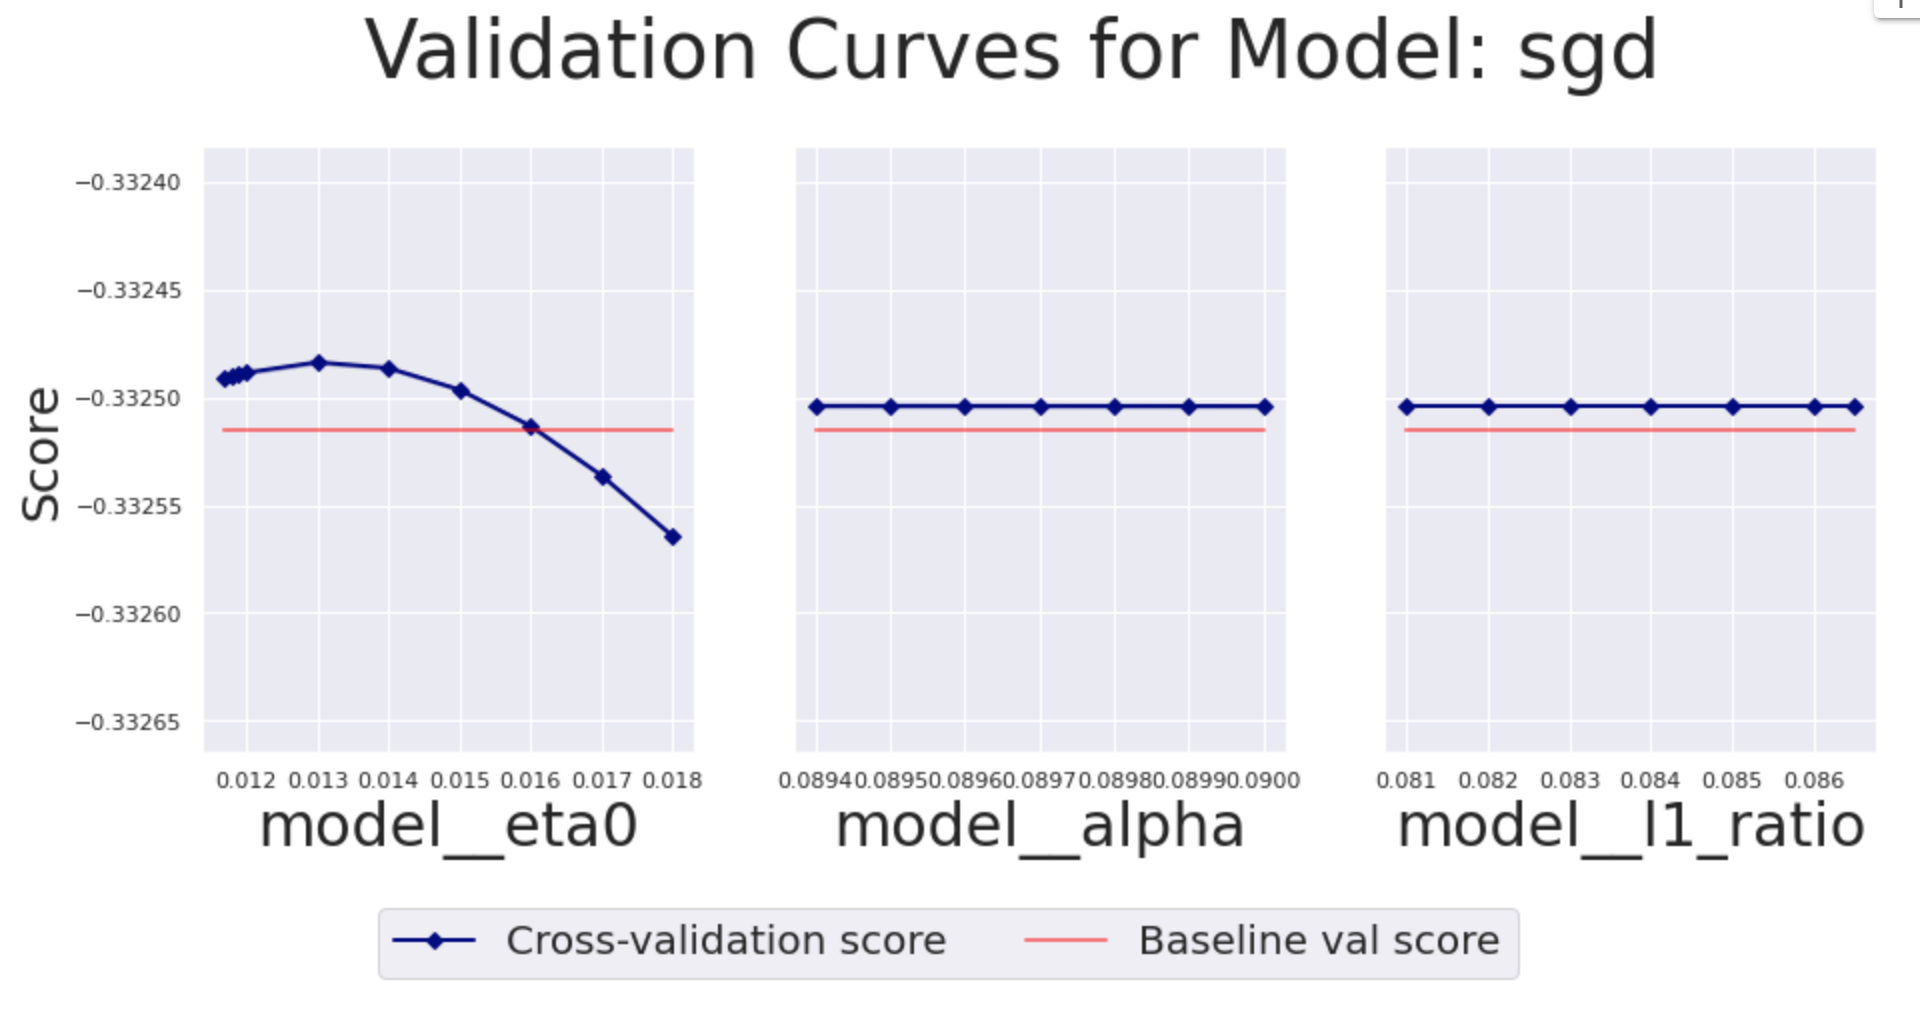

Testing regularization hyperparameters one last time:
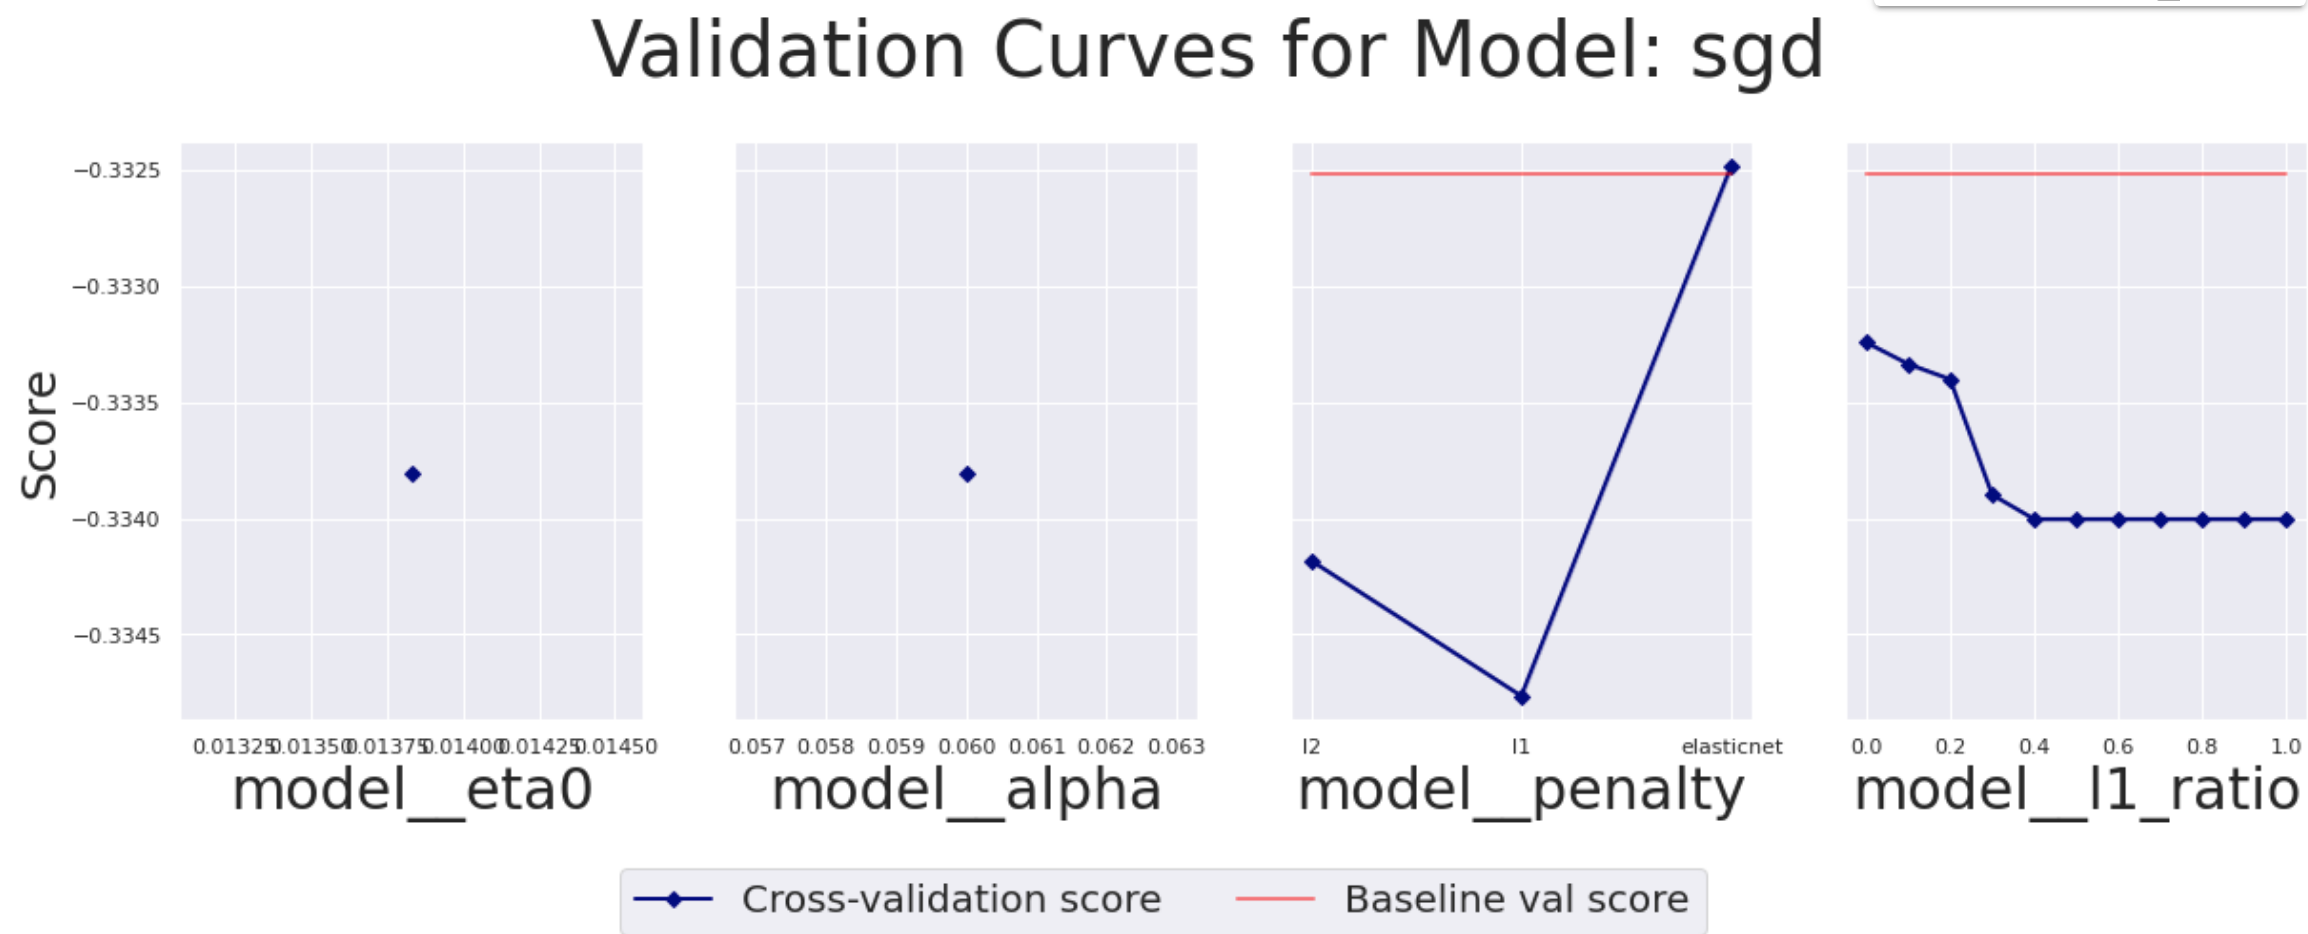

Converging on Optimal Hyperparameters

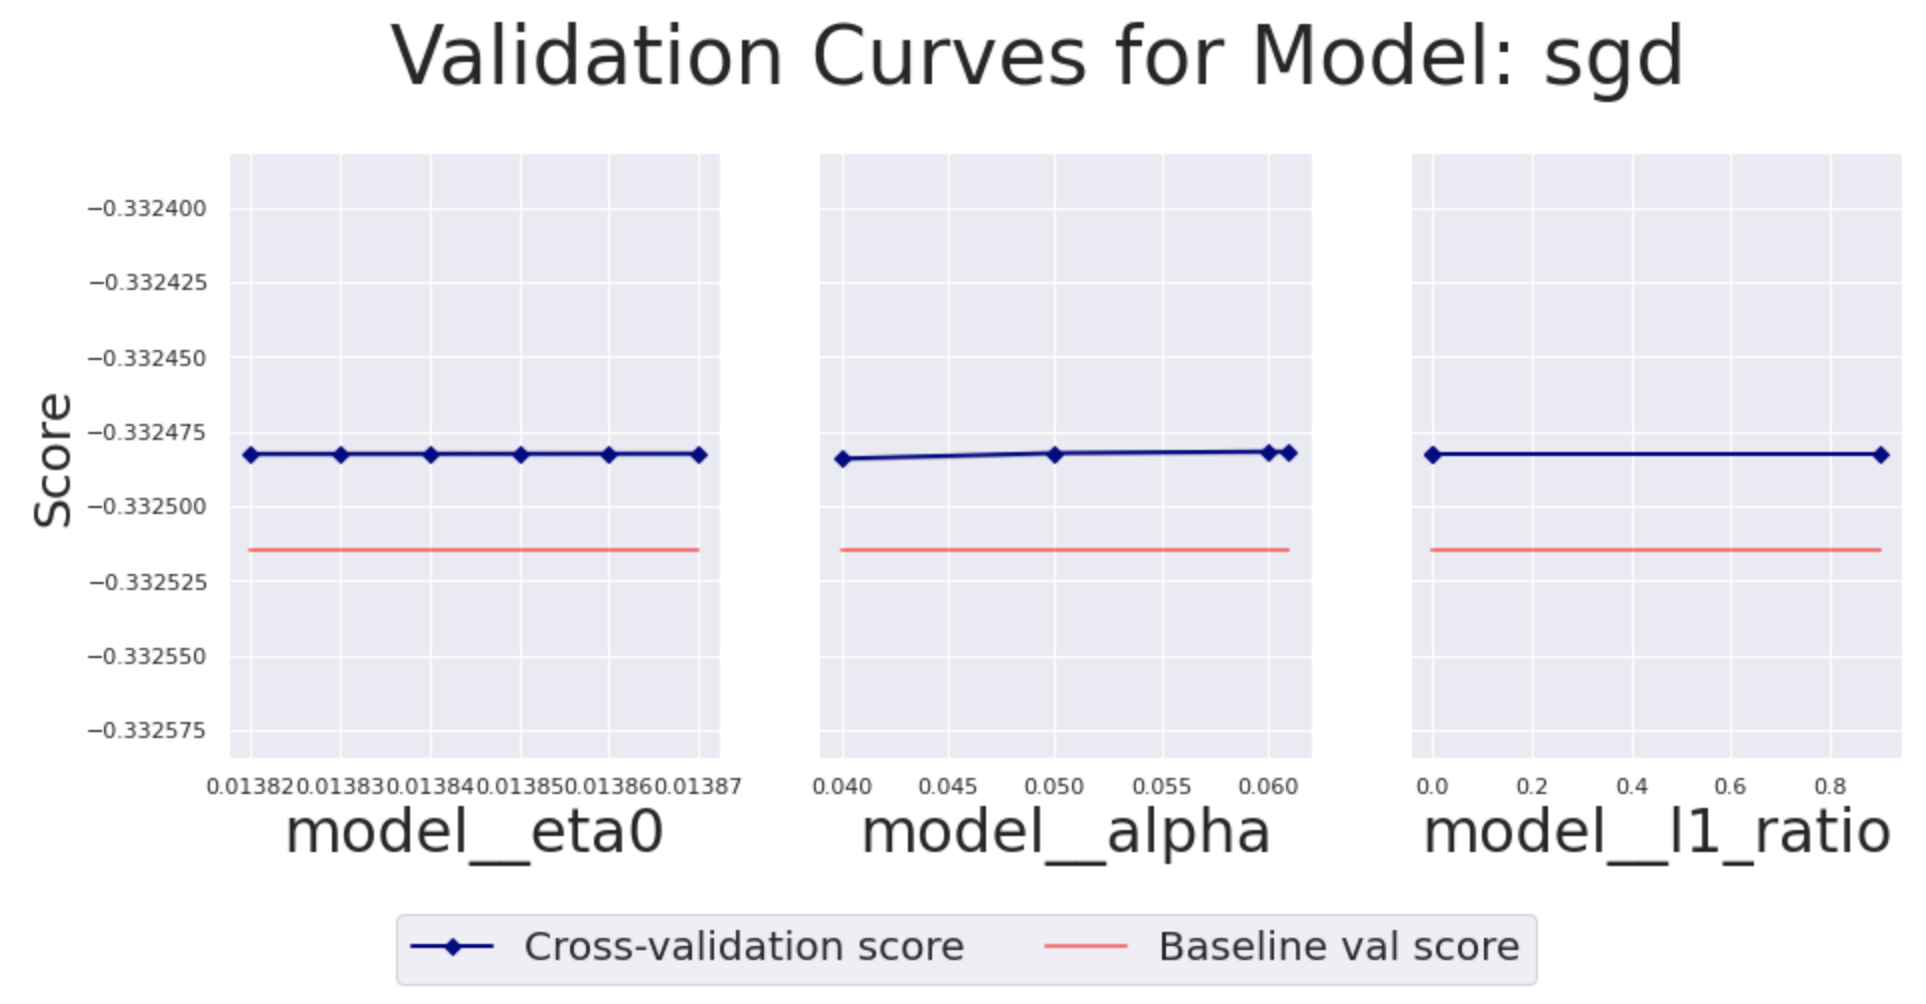

# Model Selection

Here we will select best_estimator_gs as the best model. Later we will use this best model to generate the submission file for this kaggle competition.

In [ ]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [ ]:
# Check best score
best_score_gs

-0.3324817929642631

In [ ]:
# Check best hyperparameters
best_params_gs

{'model__alpha': 0.06, 'model__eta0': 0.01383, 'model__l1_ratio': 0}

In [ ]:
# Check best estimator pipeline
best_estimator_gs

Pipeline(memory=None,
         steps=[('model',
                 SGDRegressor(alpha=0.06, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01383, fit_intercept=True,
                              l1_ratio=0, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=42, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

## Creating the directory for the submission file

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/submission/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Generating the submission file

In [ ]:
# Get the prediction on the testing data using best_model
y_test_pred = best_estimator_gs.predict(X_test)

# Get the dataframe of y_test_pred, which has the same shape as df_train
df_y_test_pred = pd.DataFrame(np.tile(y_test_pred.reshape(-1, 1), df_train.shape[1]),
                              columns=df_train.columns)

# Transform df_y_test_pred back to the original scale
df_y_test_pred = pd.DataFrame(ss.inverse_transform(df_y_test_pred),
                              columns=df_train.columns)

# Get the submission dataframe
df_submit = pd.DataFrame(np.hstack((df_raw_test[['id']], df_y_test_pred[[target]])),
                         columns=['id', target])                                                                                      

# Generate the submission file
df_submit.to_csv(abspath_curr + 'result/submission/submission.csv', index=False)